In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

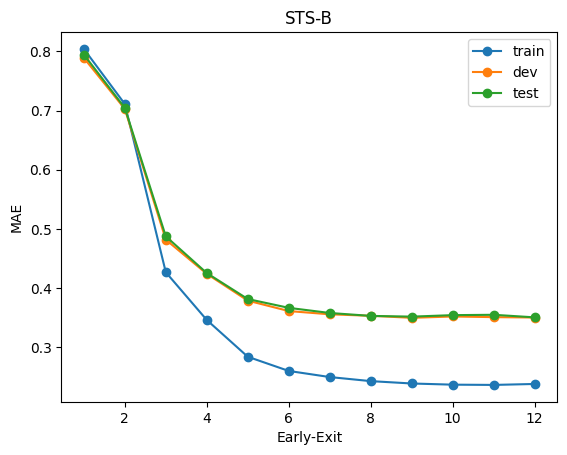

In [2]:
# MODEL = 'sts-b'
# MODEL = 'sts-b-qr'
# MODEL = 'sts-b-large'
MODEL = 'sick'

for data_type in ['train', 'dev', 'test']:

    preds = torch.load(f'output/{MODEL}/logits_{data_type}.pt')
    if 'qr' in MODEL:
        preds = preds.mean(axis=2)
    else:
        preds = preds.squeeze()
    targets = torch.load(f'output/{MODEL}/targets_{data_type}.pt')
    h_arr = torch.load(f'output/{MODEL}/h_{data_type}.pt')

    L, N = preds.shape


    preds.shape, targets.shape, h_arr.shape

    # compute MAE for each dimension of preds
    mae = torch.abs(preds - targets).mean(dim=1).cpu().numpy()

    # plot mae on y axis and early-exit index on x axis

    plt.plot([l + 1 for l in range(L)], mae, marker='o', label=data_type)

plt.legend()
plt.xlabel('Early-Exit')
plt.ylabel('MAE')
plt.title('STS-B')
plt.show()
